In [66]:
# Data Manipulation and Linear Algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier


from sklearn import ensemble

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

from pprint import pprint

In [67]:
data = pd.read_csv("churn.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
data[["Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]].max()

Tenure                 10.00
NumOfProducts           4.00
HasCrCard               1.00
IsActiveMember          1.00
EstimatedSalary    199992.48
dtype: float64

In [69]:
data[["Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]].min()

Tenure              0.00
NumOfProducts       1.00
HasCrCard           0.00
IsActiveMember      0.00
EstimatedSalary    11.58
dtype: float64

In [70]:
# Dropping the columns we will not need

drop_cols = ["RowNumber", "CustomerId", "Surname"]
data.drop(columns=drop_cols, inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#On further investigation, NumOfProducts causes bias on the model
data[["Exited", "NumOfProducts"]].value_counts()

Exited  NumOfProducts
0       2                4242
        1                3675
1       1                1409
        2                 348
        3                 220
        4                  60
0       3                  46
dtype: int64

In [7]:
#Dropping the number of products column
data.drop(columns=["NumOfProducts"], inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,1,0,113931.57,1
3,699,France,Female,39,1,0.00,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [8]:
data[["Exited", "IsActiveMember"]].value_counts()

Exited  IsActiveMember
0       1                 4416
        0                 3547
1       0                 1302
        1                  735
dtype: int64

In [9]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:>

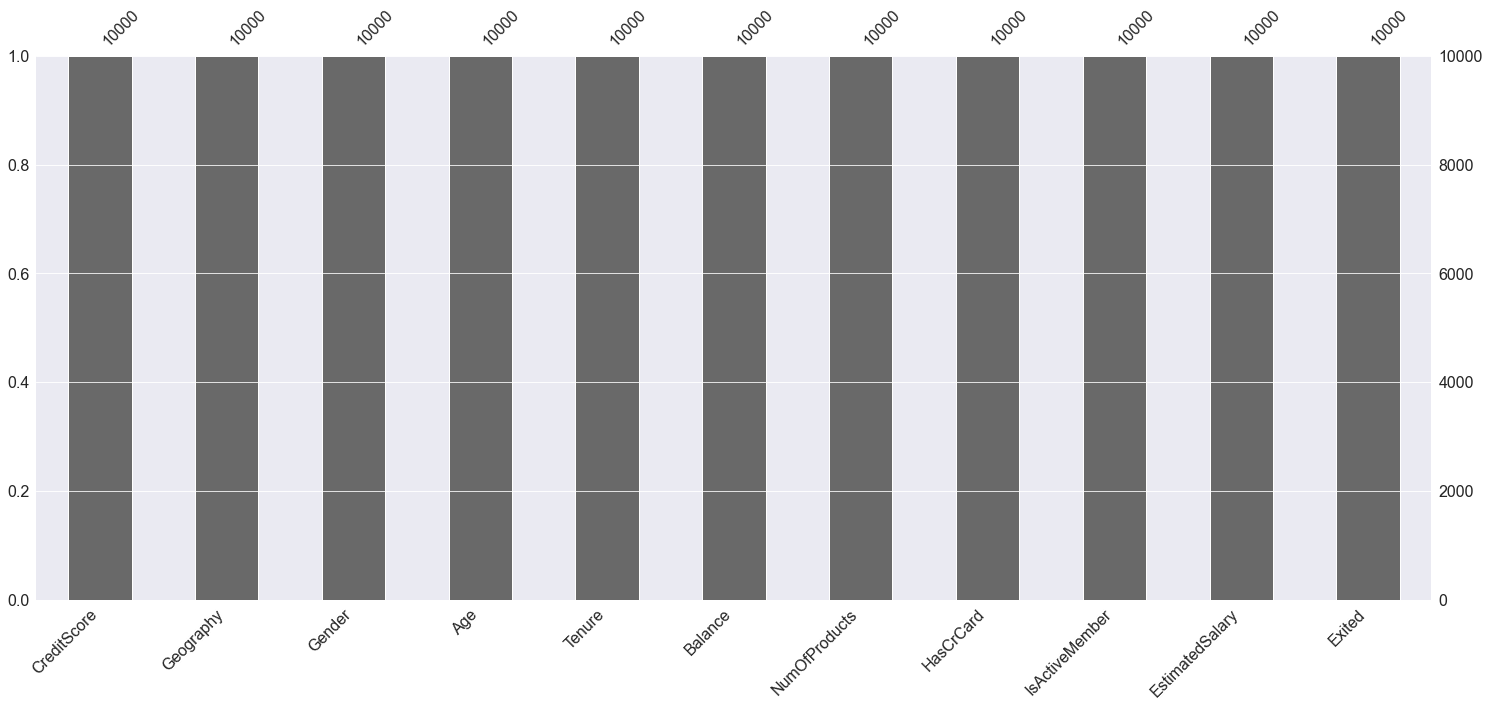

In [71]:
#Checking for null values using missingno
import missingno as msno
msno.bar(data)

In [72]:
# No missing values seen through missingno visualization
# Double checking using isna and info
data.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [74]:
# More insights on the data
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


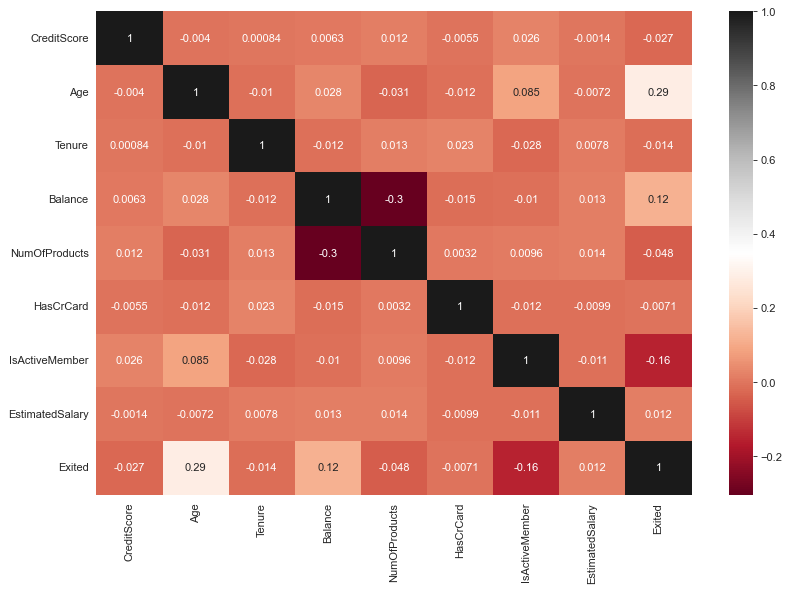

In [75]:
# Performing Exploratory Data Analysis
plt.figure(dpi=80, figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="RdGy")
plt.show()

Text(0.5, 1.0, 'Exited vs Age')

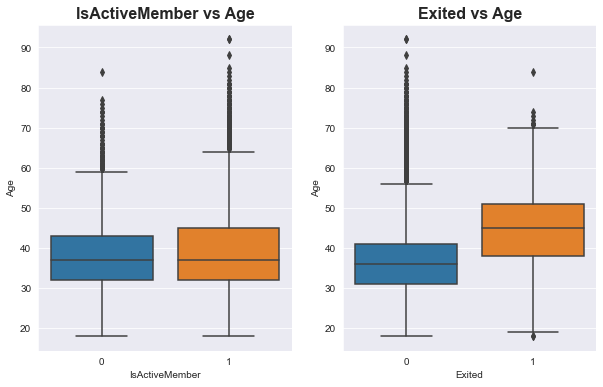

In [76]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
sns.boxplot(x="IsActiveMember", y="Age", data=data)
plt.title("IsActiveMember vs Age", fontdict={"fontsize": 16, "fontweight":600})

plt.subplot(122)
sns.boxplot(x="Exited", y="Age", data=data)
plt.title("Exited vs Age", fontdict={"fontsize": 16, "fontweight":600})

Text(0.5, 1.0, 'Exited vs CreditScore')

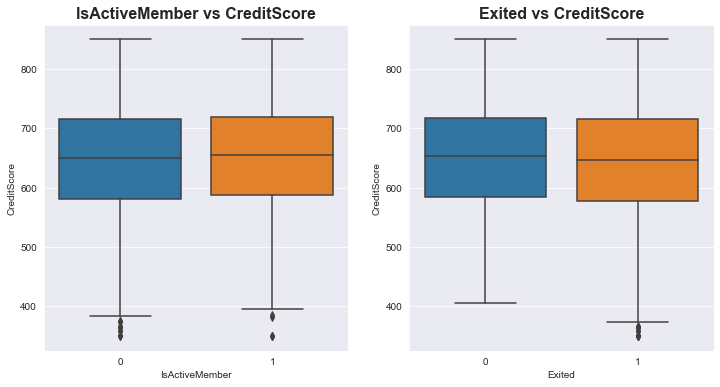

In [77]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.boxplot(x="IsActiveMember", y="CreditScore", data=data)
plt.title("IsActiveMember vs CreditScore", fontdict={"fontsize": 16, "fontweight":600})

plt.subplot(122)
sns.boxplot(x="Exited", y="CreditScore", data=data)
plt.title("Exited vs CreditScore", fontdict={"fontsize": 16, "fontweight":600})

# Not much insights gained frocomparing the user status and the creditscore

Text(0.5, 1.0, 'NumOfProducts vs Balance')

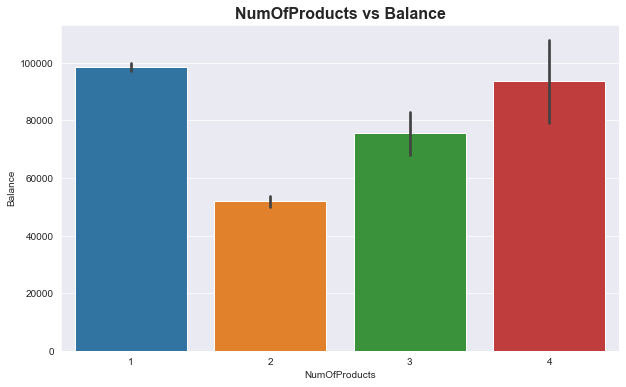

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x="NumOfProducts", y="Balance", data=data)
plt.title("NumOfProducts vs Balance", fontdict={"fontsize": 16, "fontweight":600})

# A majority of the clients either have 1 or 4 products
# The minority have 2 products, though still a substantive number

<AxesSubplot:xlabel='Balance', ylabel='Count'>

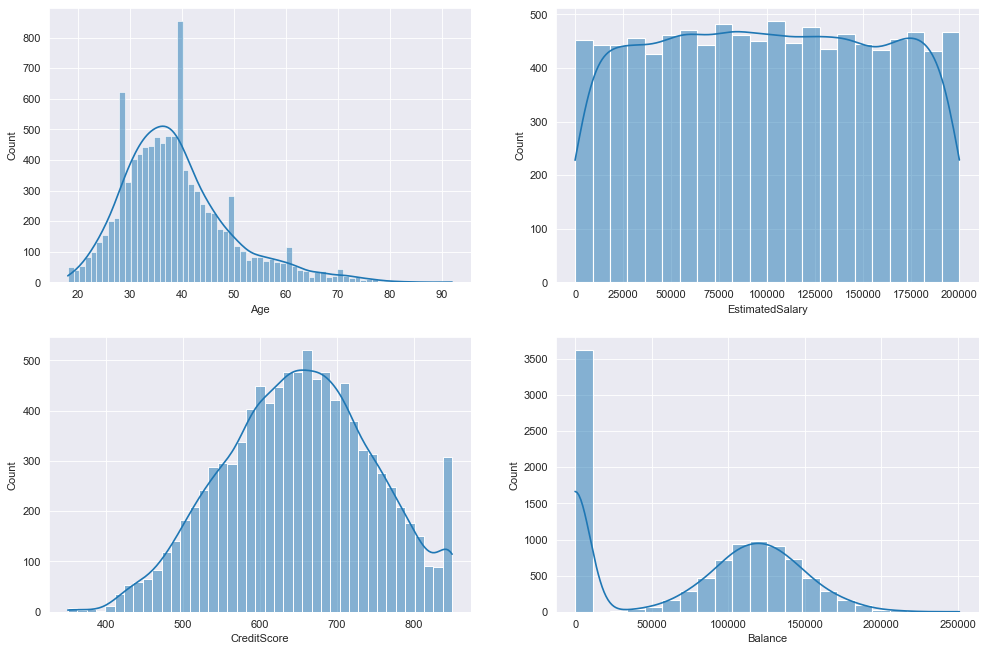

In [79]:
plt.figure(figsize=(15, 10), dpi=80)

plt.subplot(221)
sns.histplot(data["Age"], kde=True) # Age is negatively skewed.Majority of population aged between 30 & 40

plt.subplot(222)
sns.histplot(data["EstimatedSalary"], kde=True) # Salary is Well Distributed

plt.subplot(223)
sns.histplot(data["CreditScore"], kde=True) # Salary is positively skewed. Majority having a credit score between 600 and 700

plt.subplot(224)
sns.histplot(data["Balance"], kde=True) # with 0 ignored, the data is normally distributed

In [80]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [81]:
# #Data Preparation
# #Using Label Encoder
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# data["Gender"] = le.fit_transform(data["Gender"])
# data.head(10)

In [82]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')
nominal = onehot.fit_transform(data[["Gender"]])
df_nominal = pd.DataFrame(index = data.index, data = nominal, columns=onehot.get_feature_names(["Gender"]))
data = pd.concat([data, df_nominal], axis = 1)
data.drop(columns=["Gender"], inplace=True)
data.rename(columns = {"Gender_Male": "Gender"}, inplace=True)
data.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender
0,619,France,42,2,0.00,1,1,1,101348.88,1,0.0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0.0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0.0
3,699,France,39,1,0.00,2,0,0,93826.63,0,0.0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0.0


In [83]:
onehot = OneHotEncoder(sparse=False, handle_unknown='error')
nominal = onehot.fit_transform(data[["Geography"]])
df_nominal = pd.DataFrame(index = data.index, data = nominal, columns=onehot.get_feature_names(["Geography"]))
data = pd.concat([data, df_nominal], axis = 1)
data.drop(columns=["Geography"], inplace=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,1.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,0.0,1.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,1.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,1.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,0.0,1.0


In [84]:
# Train-Test Split --> stratified
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['Exited']):
    train = data.loc[train_index]
    test = data.loc[test_index]

In [85]:
X_train = train.drop("Exited", axis=1)
y_train = train["Exited"]

X_test = test.drop("Exited", axis=1)
y_test = test["Exited"]

In [86]:
from collections import Counter

print(Counter(y_train))

Counter({0: 6370, 1: 1630})


In [87]:
# Feature Scaling
cols_to_scale = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

sc = StandardScaler()

X_train[cols_to_scale] = sc.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = sc.transform(X_test[cols_to_scale])

In [88]:
#4.1. Oversampling (SMOTE: Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE(sampling_strategy='auto', k_neighbors=7, random_state=42)

X_train, y_train =  oversample.fit_resample(X_train, y_train)
print(Counter(y_train))


Counter({1: 6370, 0: 6370})


In [89]:
# #4.2. Random Undersampling

# from imblearn.under_sampling import RandomUnderSampler

# undersample = RandomUnderSampler(random_state=42)

# X_train, y_train = undersample.fit_resample(X_train, y_train)
# print(Counter(y_train))

In [90]:
# RandomForestClassifier
def MLA_testing(MLA, X_train, X_test, y_train, y_test):      
    # Training The Model
    MLA.fit(X_train.values, y_train)

    # KFold Accuracies on Training Data
    kfold_accuracy = cross_val_score(estimator = MLA, X = X_train, y = y_train, cv = 10, n_jobs=-1)
    print("K-Fold Accuracies:\n", kfold_accuracy, "\n")
    
    # Prediction on Testing Data
    y_pred = cross_val_predict(estimator = MLA, X = X_test, y = y_test, cv = 10, n_jobs=-1)
    
    # Accuracy for y_test and y_pred
    classifier_accuracy_score = accuracy_score(y_test, y_pred)
    print("Accuracy Score:\n", classifier_accuracy_score, "\n")
    
    # Confusion Matrix
    conf_mtx = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_mtx, "\n")
    
    # Classification Report
    class_rep = classification_report(y_test, y_pred)
    print("Classification Report:\n", class_rep, "\n")
    
    try:
        # Precision - Recall Curve
        yhat = MLA.predict_proba(X_test)
        precision, recall, _ = precision_recall_curve(y_test, yhat[:, 1])
        
        plt.figure(dpi=100, figsize=(15, 6))
        plt.subplot(121)
        sns.lineplot([0, 1], [1, 0], linestyle='--', label='No Skill')
        sns.lineplot(recall, precision, marker='.', label=MLA.__class__.__name__)
        plt.title("Recall vs Precision Curve")
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend()
        
        # ROC Curve
        plt.subplot(122)
        sns.lineplot([0, 1], [0, 1], linestyle='--', label='No Skill')
        fpr, tpr, _ = roc_curve(y_test, yhat[:, 1])
        sns.lineplot(fpr, tpr, marker='.', label=MLA.__class__.__name__)
        plt.title("ROC Curve")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        
        plt.show()
    except:
        pass
    
    # Important Features for The Algorithms
    imp_cols = pd.DataFrame()
    imp_cols["Features"] = X_train.columns
    imp_cols["Importance"] = MLA.feature_importances_
    imp_cols = imp_cols.sort_values(by="Importance", ascending=False)
    
    plt.figure(dpi=80, figsize=(10, 8))
    sns.barplot(y="Features", x="Importance", data=imp_cols)
    plt.title("Importance of Features")
    plt.show()

K-Fold Accuracies:
 [0.82103611 0.82731554 0.88147567 0.92621664 0.91679749 0.91365777
 0.90188383 0.92386185 0.91758242 0.91915228] 

Accuracy Score:
 0.863 

Confusion Matrix:
 [[1548   45]
 [ 229  178]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.44      0.57       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000
 



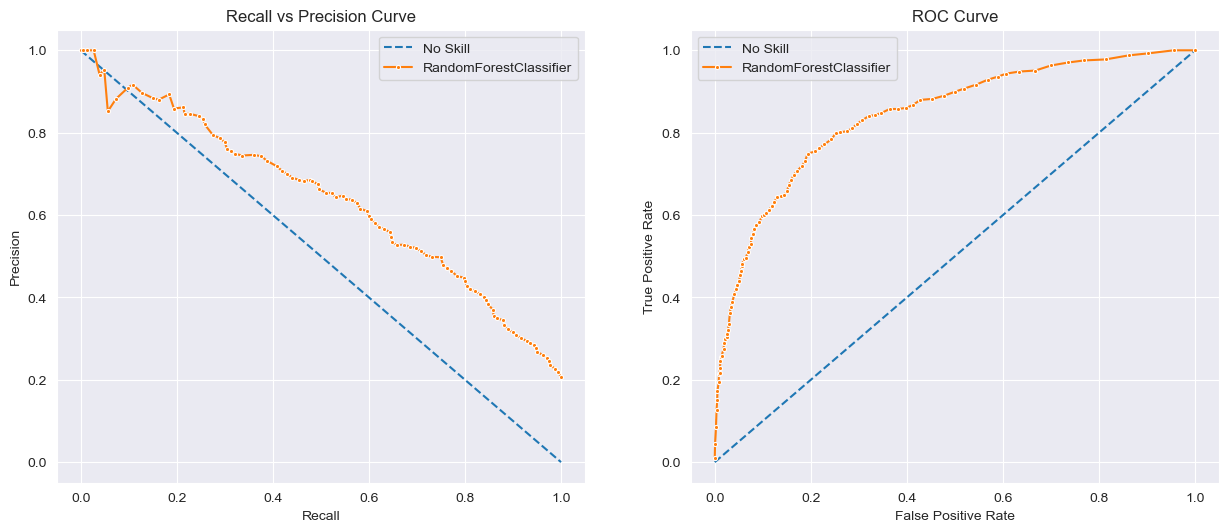

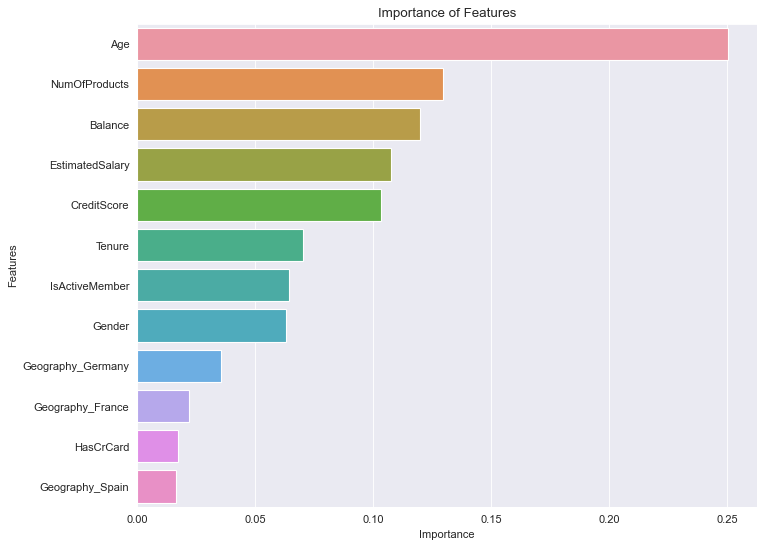

In [91]:
# Instantiate the model
rf_clf = RandomForestClassifier()
MLA_testing(rf_clf, X_train, X_test, y_train, y_test)

In [92]:
# Hypeparameter Tuning using RandomGrid
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [93]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [94]:
# Create the random grid
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [95]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(
    estimator = rf_clf,
    param_distributions = grid, 
    n_iter = 100, 
    cv = 3,
    verbose=2,
    random_state=42,
    n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [96]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict


In [98]:
# Make predictions with the best hyperparameters
rs_y_preds = rf_random.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 83.55%
Precision: 0.60
Recall: 0.56
F1 score: 0.58


In [39]:
# Hyperparameter Tuning using GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(
    estimator = rf_clf,
    param_grid = param_grid, 
    cv = 3,
    n_jobs = -1,
    verbose = 2)

In [40]:
# Fit the grid search to the data
grid_search.fit(X_train.values, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [41]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = grid_search.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 80.35%
Precision: 0.52
Recall: 0.53
F1 score: 0.52


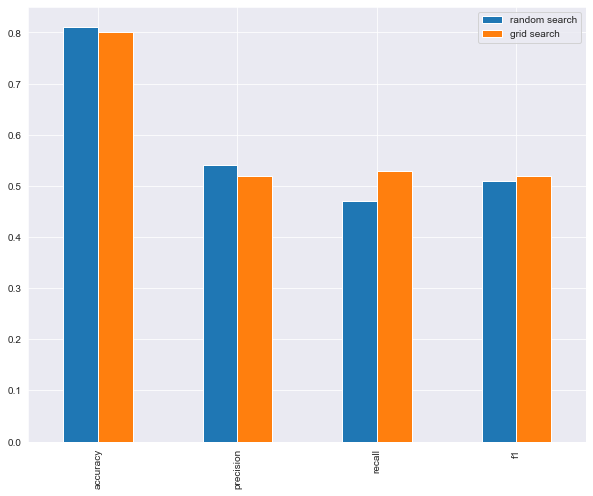

In [42]:
compare_metrics = pd.DataFrame({
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

In [58]:
from joblib import dump, load

# Save a model to file
dump(grid_search, filename="churn_model.joblib")

['churn_model.joblib']

In [59]:
# Import a saved joblib model
loaded_joblib_model = load(filename="churn_model.joblib")

In [60]:
# Make and evaluate joblib predictions 
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 80.35%
Precision: 0.52
Recall: 0.53
F1 score: 0.52


{'accuracy': 0.8, 'precision': 0.52, 'recall': 0.53, 'f1': 0.52}

In [99]:
# Using pickle
import pickle

# Save an existing model to file
pickle.dump(rf_random, open("churn_model.pkl", "wb"))

In [100]:
#Load a saved model
loaded_pickle_model = pickle.load(open("churn_model.pkl", "rb"))

In [101]:
# Make predictions and evaluate the loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 83.55%
Precision: 0.60
Recall: 0.56
F1 score: 0.58


{'accuracy': 0.84, 'precision': 0.6, 'recall': 0.56, 'f1': 0.58}

In [ ]:
# Buiding the ML Model Pipeline
